<a href="https://colab.research.google.com/github/Jairburciaga/talent_drain_risk/blob/main/TALENT_DRAIN_RISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TALENT DRAIN RISK

First: Importing necessary libraries...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Second: Loading the Data.
* We're starting by loading our primary dataset, which is a CSV file containing records for 1,470 employees. Crucially, this data shows which employees left the company over the past year (our indicator for Talent Drain).

In [5]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [6]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## BUSINESS ANALYTICS TIME

looking for the shape our data has.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

#### NULL ANALYSIS

Before we begin any analysis, we need to check the quality of our data. This step identifies any blank entries, or 'missing values' (Nulos), in the employee records. Dealing with these gaps is essential for accurate modeling and trustworthy results.

In [9]:
df.isna().sum().sort_values(ascending = False)

,0
anos_en_puesto,1238
conciliacion,1011
sexo,199
educacion,101
satisfaccion_trabajo,76
implicacion,18
viajes,0
carrera,0
distancia_casa,0
departamento,0


Conclusions:

* Variables anos_en_puesto and conciliacion has too many nulls on them --> drop whole columns wich doesnt add relevant information (due the low quality on those records)
* sexo, educacion, satisfaccion_trabajo and implicacion --> imput them after an EDA.

Note: Dataset is in spanish, droped columns are: anos_en_puesto = years_at_role, conciliacion = work_life_balance. Imputed data will be for columns: sexo = genre, educacion = educational_level, satisfaccion_trabajo = job_satisfaction, implicacion = job_involvement


In [10]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


#### EDA FOR CATEGORICAL VARIABLES

In [12]:
def cat_eda_plot(cat):

    #For row calculations
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Defining plot shape
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #Flatening chart, so we can iterate like it would be 1d instead of 2d
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

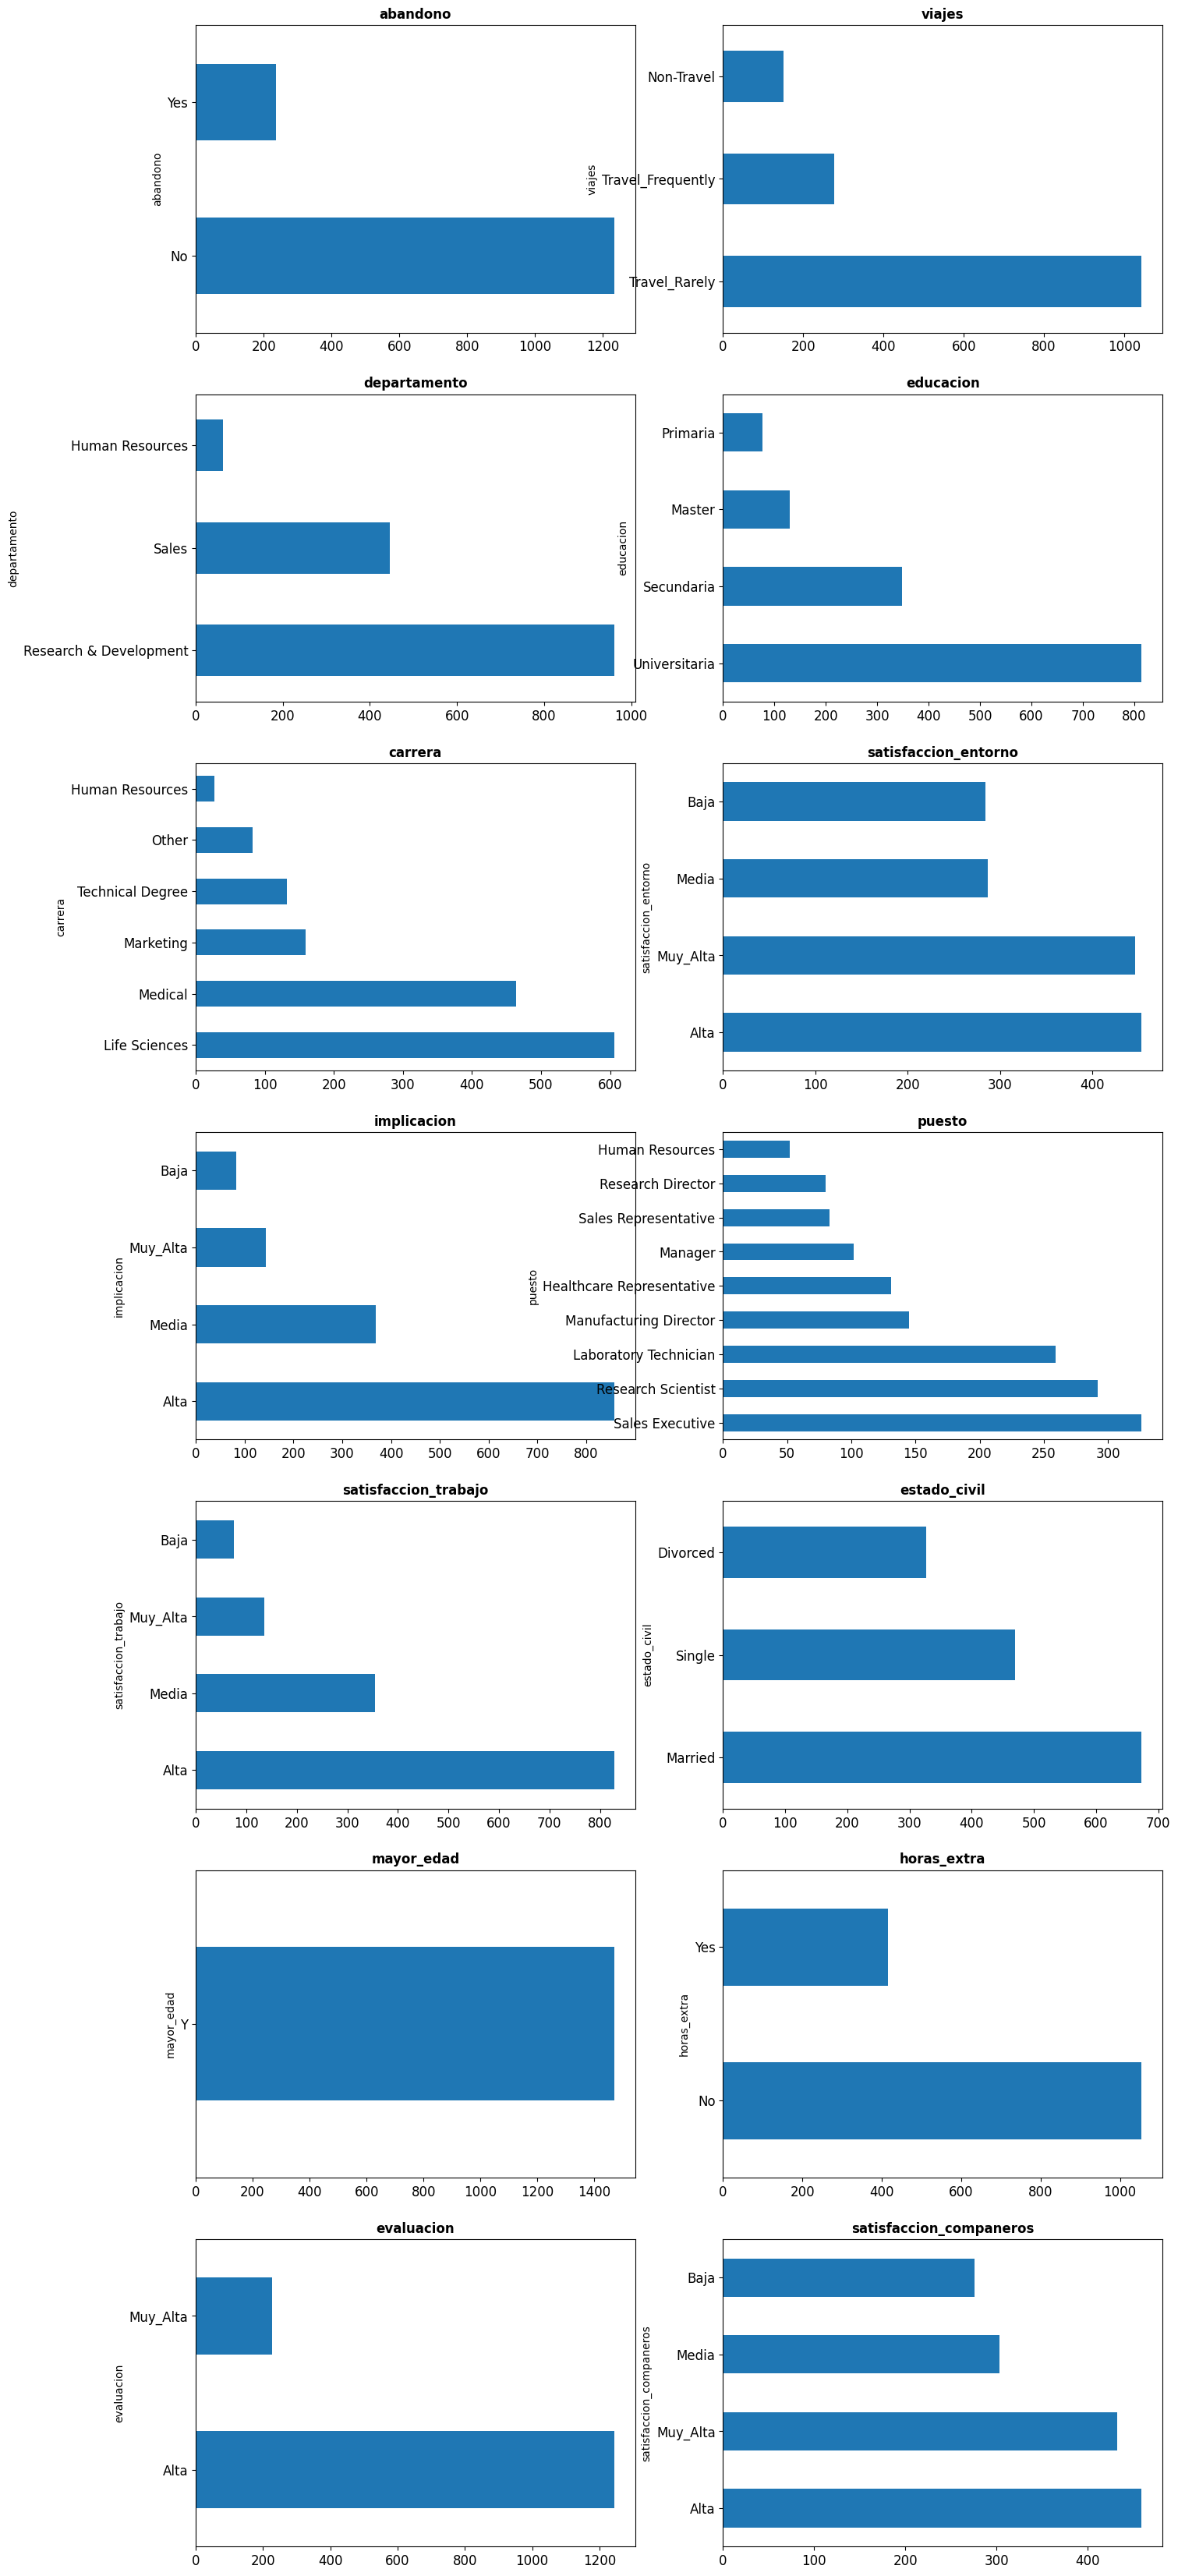

In [13]:
cat_eda_plot(df.select_dtypes('O'))

Conclusions:

* Employee Over 18 (mayor_edad) only has a single value --> Drop it.
* Regarding the pending imputation for categorical variables:
  * Educational Level (educacion): Impute with 'University'.
  * Job Satisfaction (satisfaccion_trabajo): Impute with 'High'.
  * Job Involvement (implicacion): Impute with 'High'.

In [14]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA WITH NUMERICAL VARIABLES

* Instead of using charts for it, i prefer using statistics since they have a numerical nature.

In [15]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    #Add median to it
    estadisticos['median'] = num.median()
    #sorting onthe right order, so median can we seen next to mean
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(estadisticos)

In [16]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


 Conclusions
  * Employees (Empleados) only has a single value --> Drop it.
  * Gender (Sexo) has four distinct values (4 unique values) --> Drop it.
  * Fortnightly Hours (Horas quincena) only has a single value --> Drop it.

 Note: Regarding the remaining numerical null values pending imputation, only Gender (Sexo) was left. Since we will be dropping this column, no further numerical imputation is required.

In [17]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### **Insights Generation:**

### Quantifyig the problem: What is the Turnover Rate?

In [18]:
df.abandono.value_counts(normalize = True) * 100

,proportion
abandono,
No,83.877551
Yes,16.122449


---
<br/><br/>

### Is there a typical profile who leaves the company?

In [19]:
# Transform 'abandono' into a numeric format
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

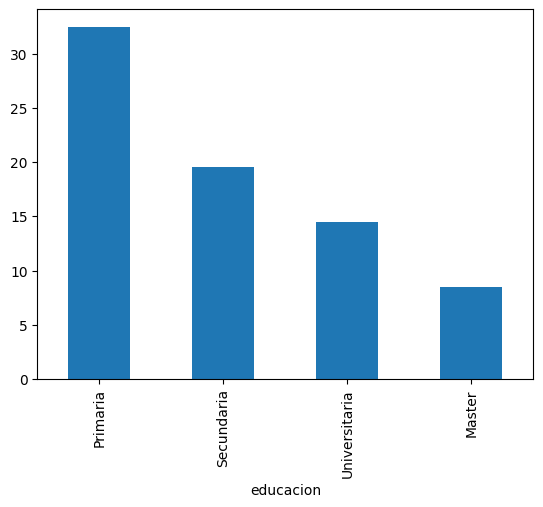

In [20]:
# Analysis by education level
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

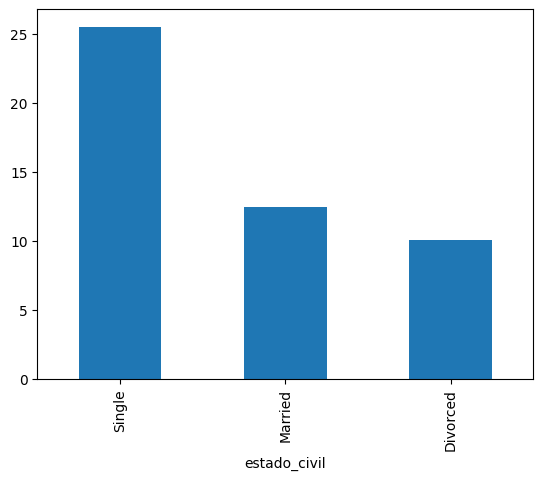

In [21]:
# Analysis by marital status
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

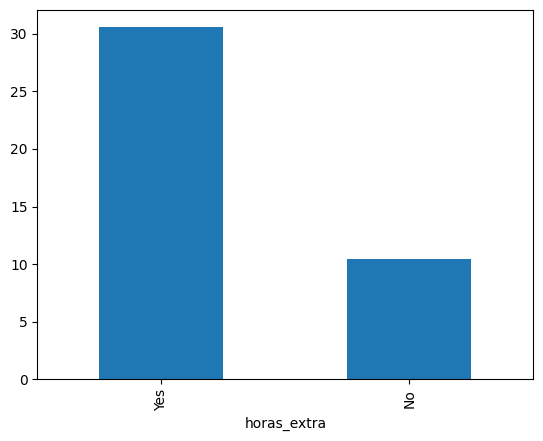

In [22]:
# Overtime
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

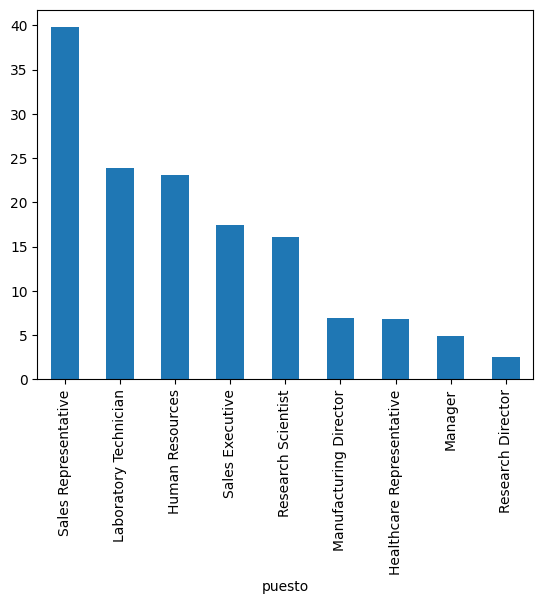

In [24]:
# Analysis by Role
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

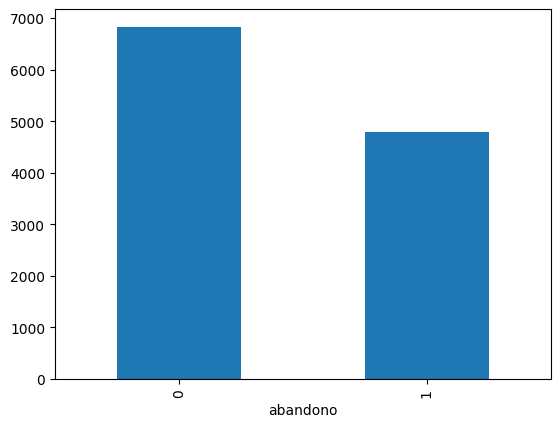

In [25]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusions: Profile Analysis
The average profile of an employee who leaves the company (Employee Turnover Profile) is characterized by the following:

* Low Educational Level
* Single Marital Status
* Works in Sales
* Low Income
* High Overtime Hours

### What is the Economic Impact of This Problem?

According to the "Cost of Turnover" study by the Center for American Progress:

* The cost of employee turnover for employees earning less than $30,000 is 16.1% of their annual salary.

* The cost of employee turnover for employees earning between $30,000 - $50,000 is 19.7% of their annual salary.

* The cost of employee turnover for employees earning between $50,000 - $75,000 is 20.4% of their annual salary.

* The cost of employee turnover for employees earning more than $75,000 is 21% of their annual salary.

Using this metrics we calculate:

In [26]:
# We create a new variable salario_ano (yearly income)
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [28]:
# Calculate the economic impact for turnover for each employee
# Conditions list
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Results list
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Apply select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### How much was the economic cost for this on the past year?

In [31]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

If we continue pulling off this thread:
### How much is costing us low motivated employees?

In [29]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

np.float64(368672.688)

Answer: $ 368,672.68

### How much can we save with a employees fidelization program?

In [32]:
print(f"Reducing Employee Turnover by 10% would save us {int(coste_total * 0.1)}$ annually.")

print(f"Reducing Employee Turnover by 20% would save us {int(coste_total * 0.2)}$ annually.")

print(f"Reducing Employee Turnover by 30% would save us {int(coste_total * 0.3)}$ annually.")

Reducing Employee Turnover by 10% would save us 271900$ annually.
Reducing Employee Turnover by 20% would save us 543801$ annually.
Reducing Employee Turnover by 30% would save us 815701$ annually.


---
<br/><br/>

### And so on, we could keep defining strategies according to a each turnover insights:

Given that Sales Representatives were identified as the job role with the highest turnover, a key question arises: Does a targeted retention plan for Sales Representatives make business sense?

To determine the potential return on investment, we first need to answer: What would be the cost savings if we reduce their turnover by 30%?

Action: First, let's calculate the turnover rate for Sales Representatives last year.

In [33]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Now calculate how many will left this year

In [34]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Hypotetically we can retain 30% of them, wich in money it will mean:

In [36]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Retain {retenemos} Sales Representative will translated to a {ahorramos}$ in savings.')

Retain 5 Sales Representative will translated to a 37447.22424578312$ in savings.


This finding is highly valuable because it allows us to determine and justify the budget for specific retention initiatives by department or profile.

We now know that we can invest up to $37,000 exclusively in specific actions to retain Sales Representatives, and this expense would be justified and fully covered by the avoided losses (prevented employee turnover).

## THE ML MODEL

In [37]:
df_ml = df.copy()

In [38]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### PREPARING DATA FOR MODELIZATION

#### Transforming categorical variables into a numerical ones

In [41]:
from sklearn.preprocessing import OneHotEncoder

#Categorical
cat = df_ml.select_dtypes('O')

#create instances
ohe = OneHotEncoder(sparse_output = False)

#Trainig
ohe.fit(cat)

#Applying
cat_ohe = ohe.transform(cat)

#Names asignment
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### FINAL DATAFRAME

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [42]:
# Selecting numerical variables co we can concatenate to cat_hoe
num = df.select_dtypes('number').reset_index(drop = True)

In [43]:
#Concatenating all in the final dataframe
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### MODELING DESIGN

#### Division of predictors and the target

In [44]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Dividing train and test

In [45]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

### Training the Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

#create instance
ac = DecisionTreeClassifier(max_depth=4)

#Train
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICTION AND VALIDATION OVER TEST

In [47]:
# Prediction
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.16145833, 0.09545455, 0.04513064, 0.04513064, 0.24561404,
       0.16145833, 0.09545455, 0.16145833, 0.04513064, 0.22857143,
       0.16145833, 0.09545455, 0.04513064, 0.04513064, 0.16145833,
       0.09545455, 0.09545455, 0.16145833, 0.04513064, 0.42857143])

In [49]:
# Evaluation
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

np.float64(0.6783165104542178)

### INTERPRETING

#### TREE DIAGRAM

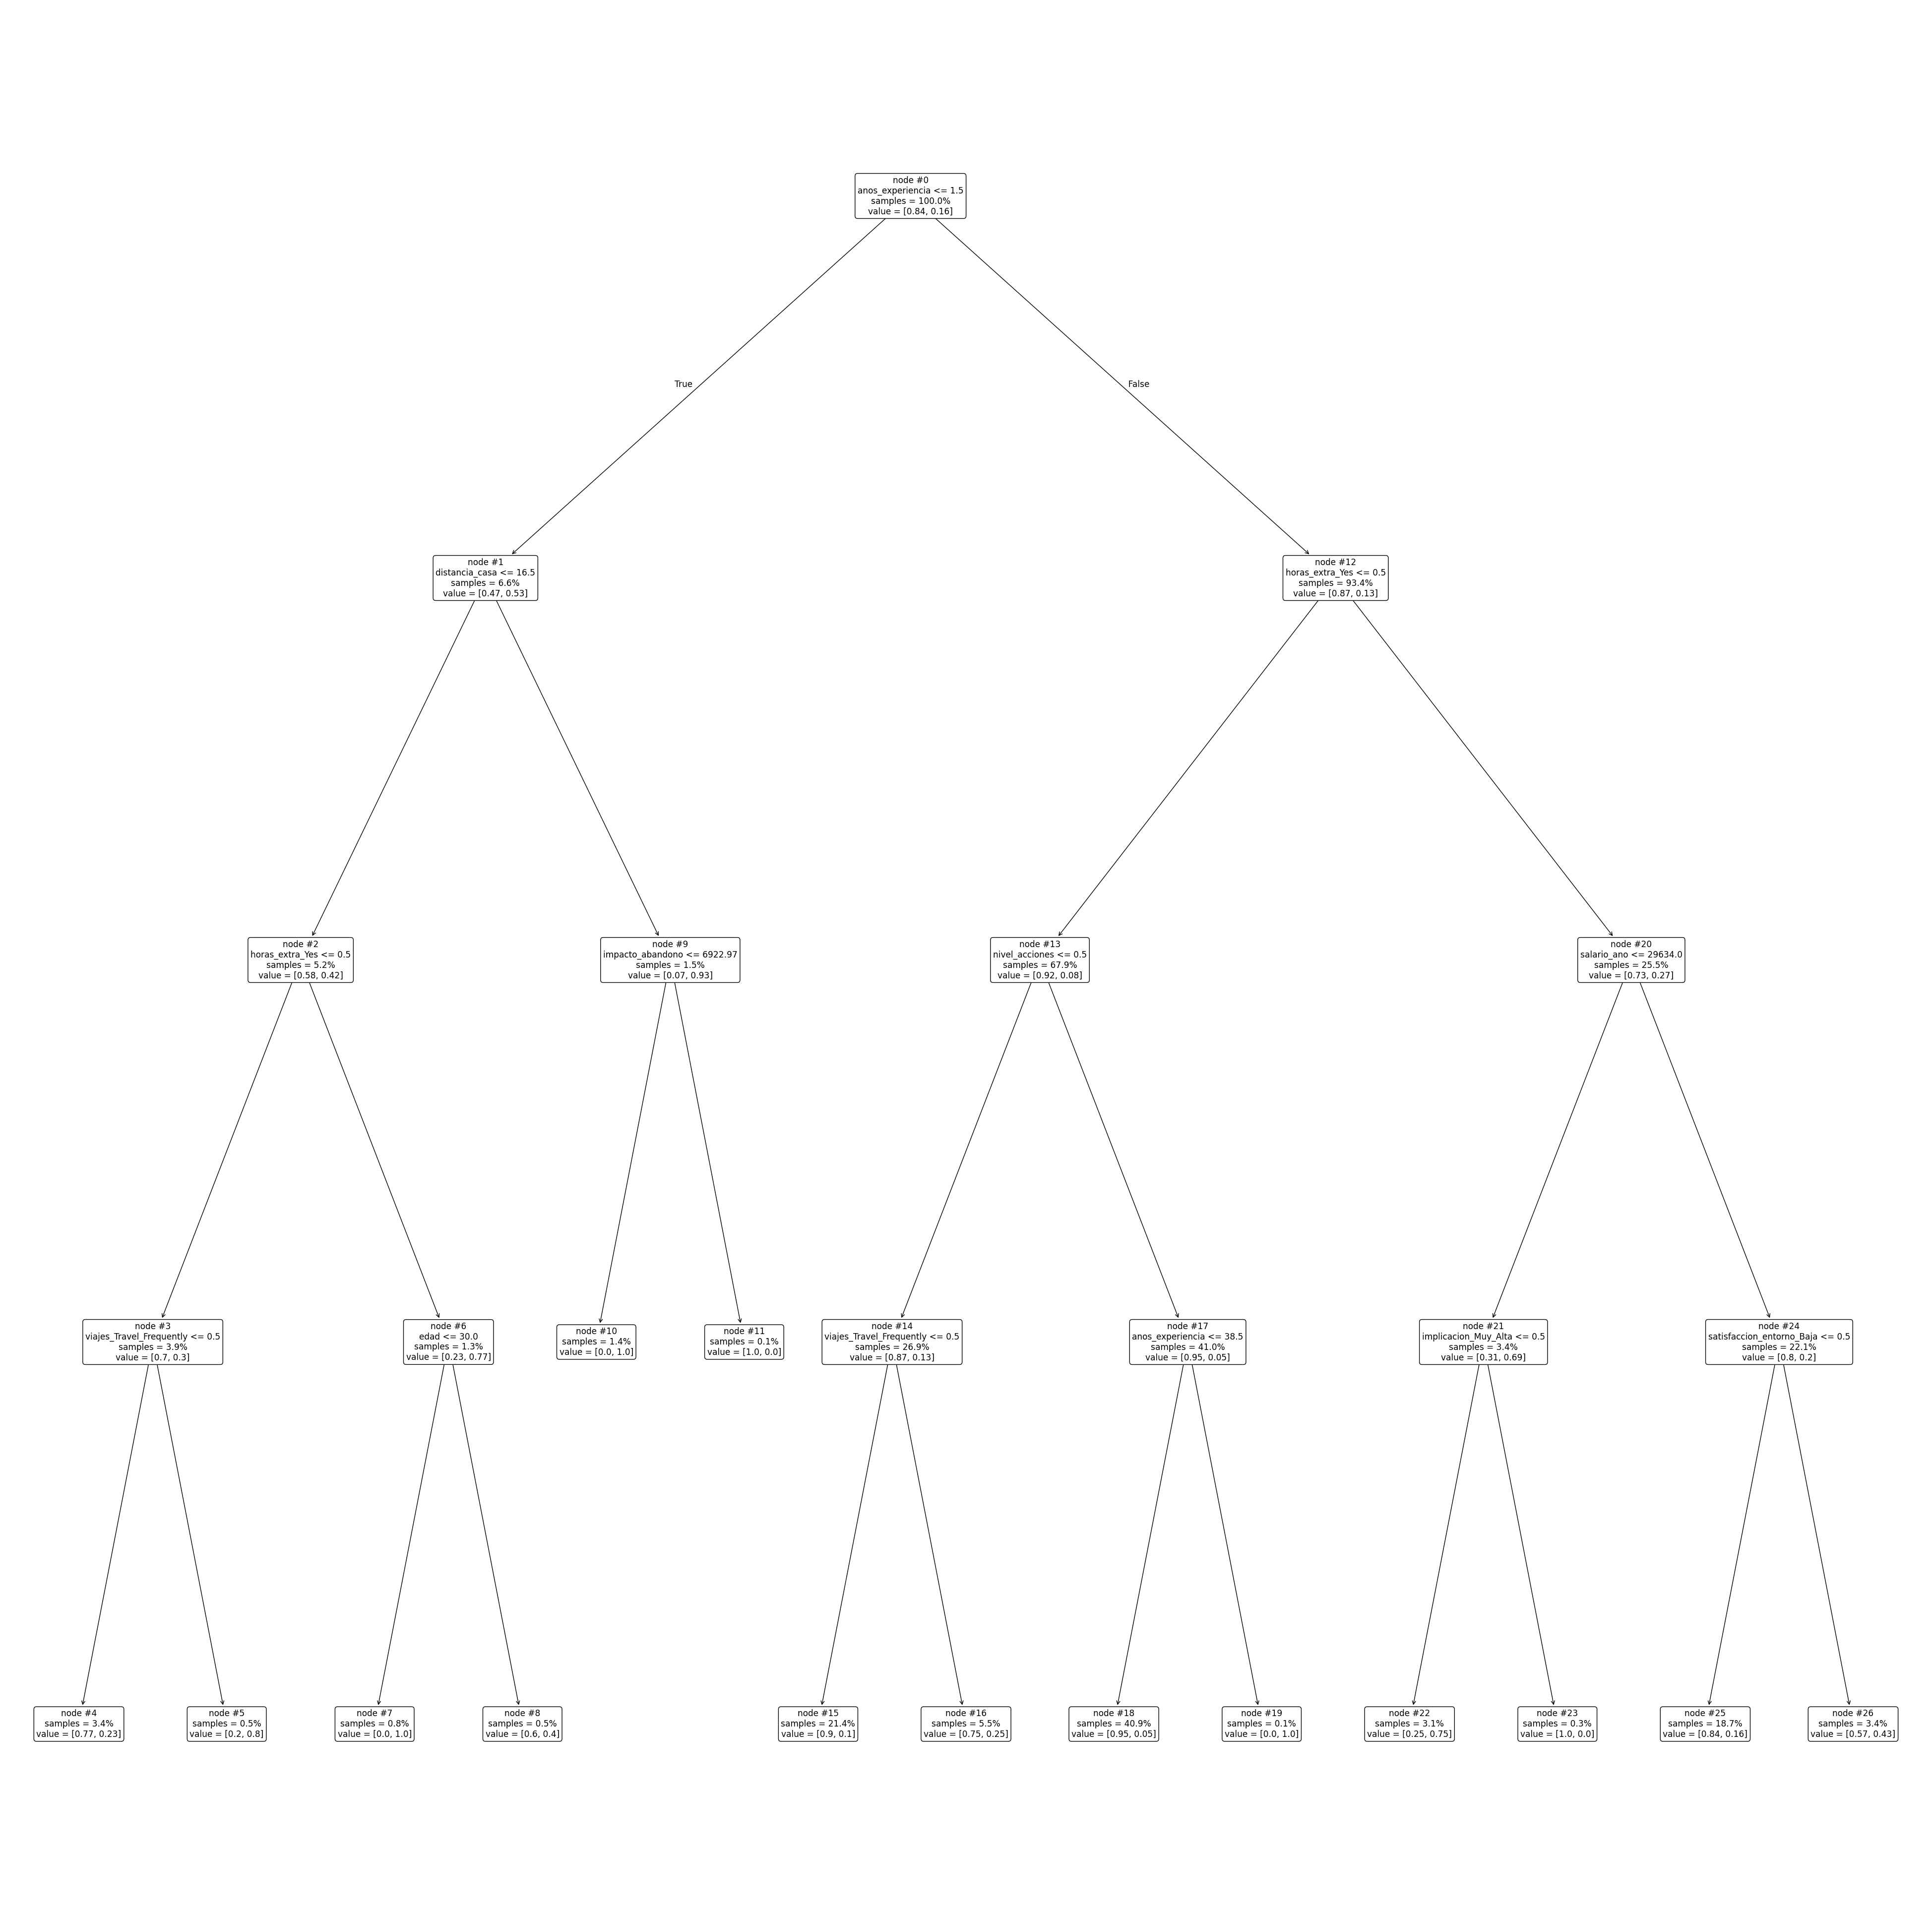

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Variable Importance


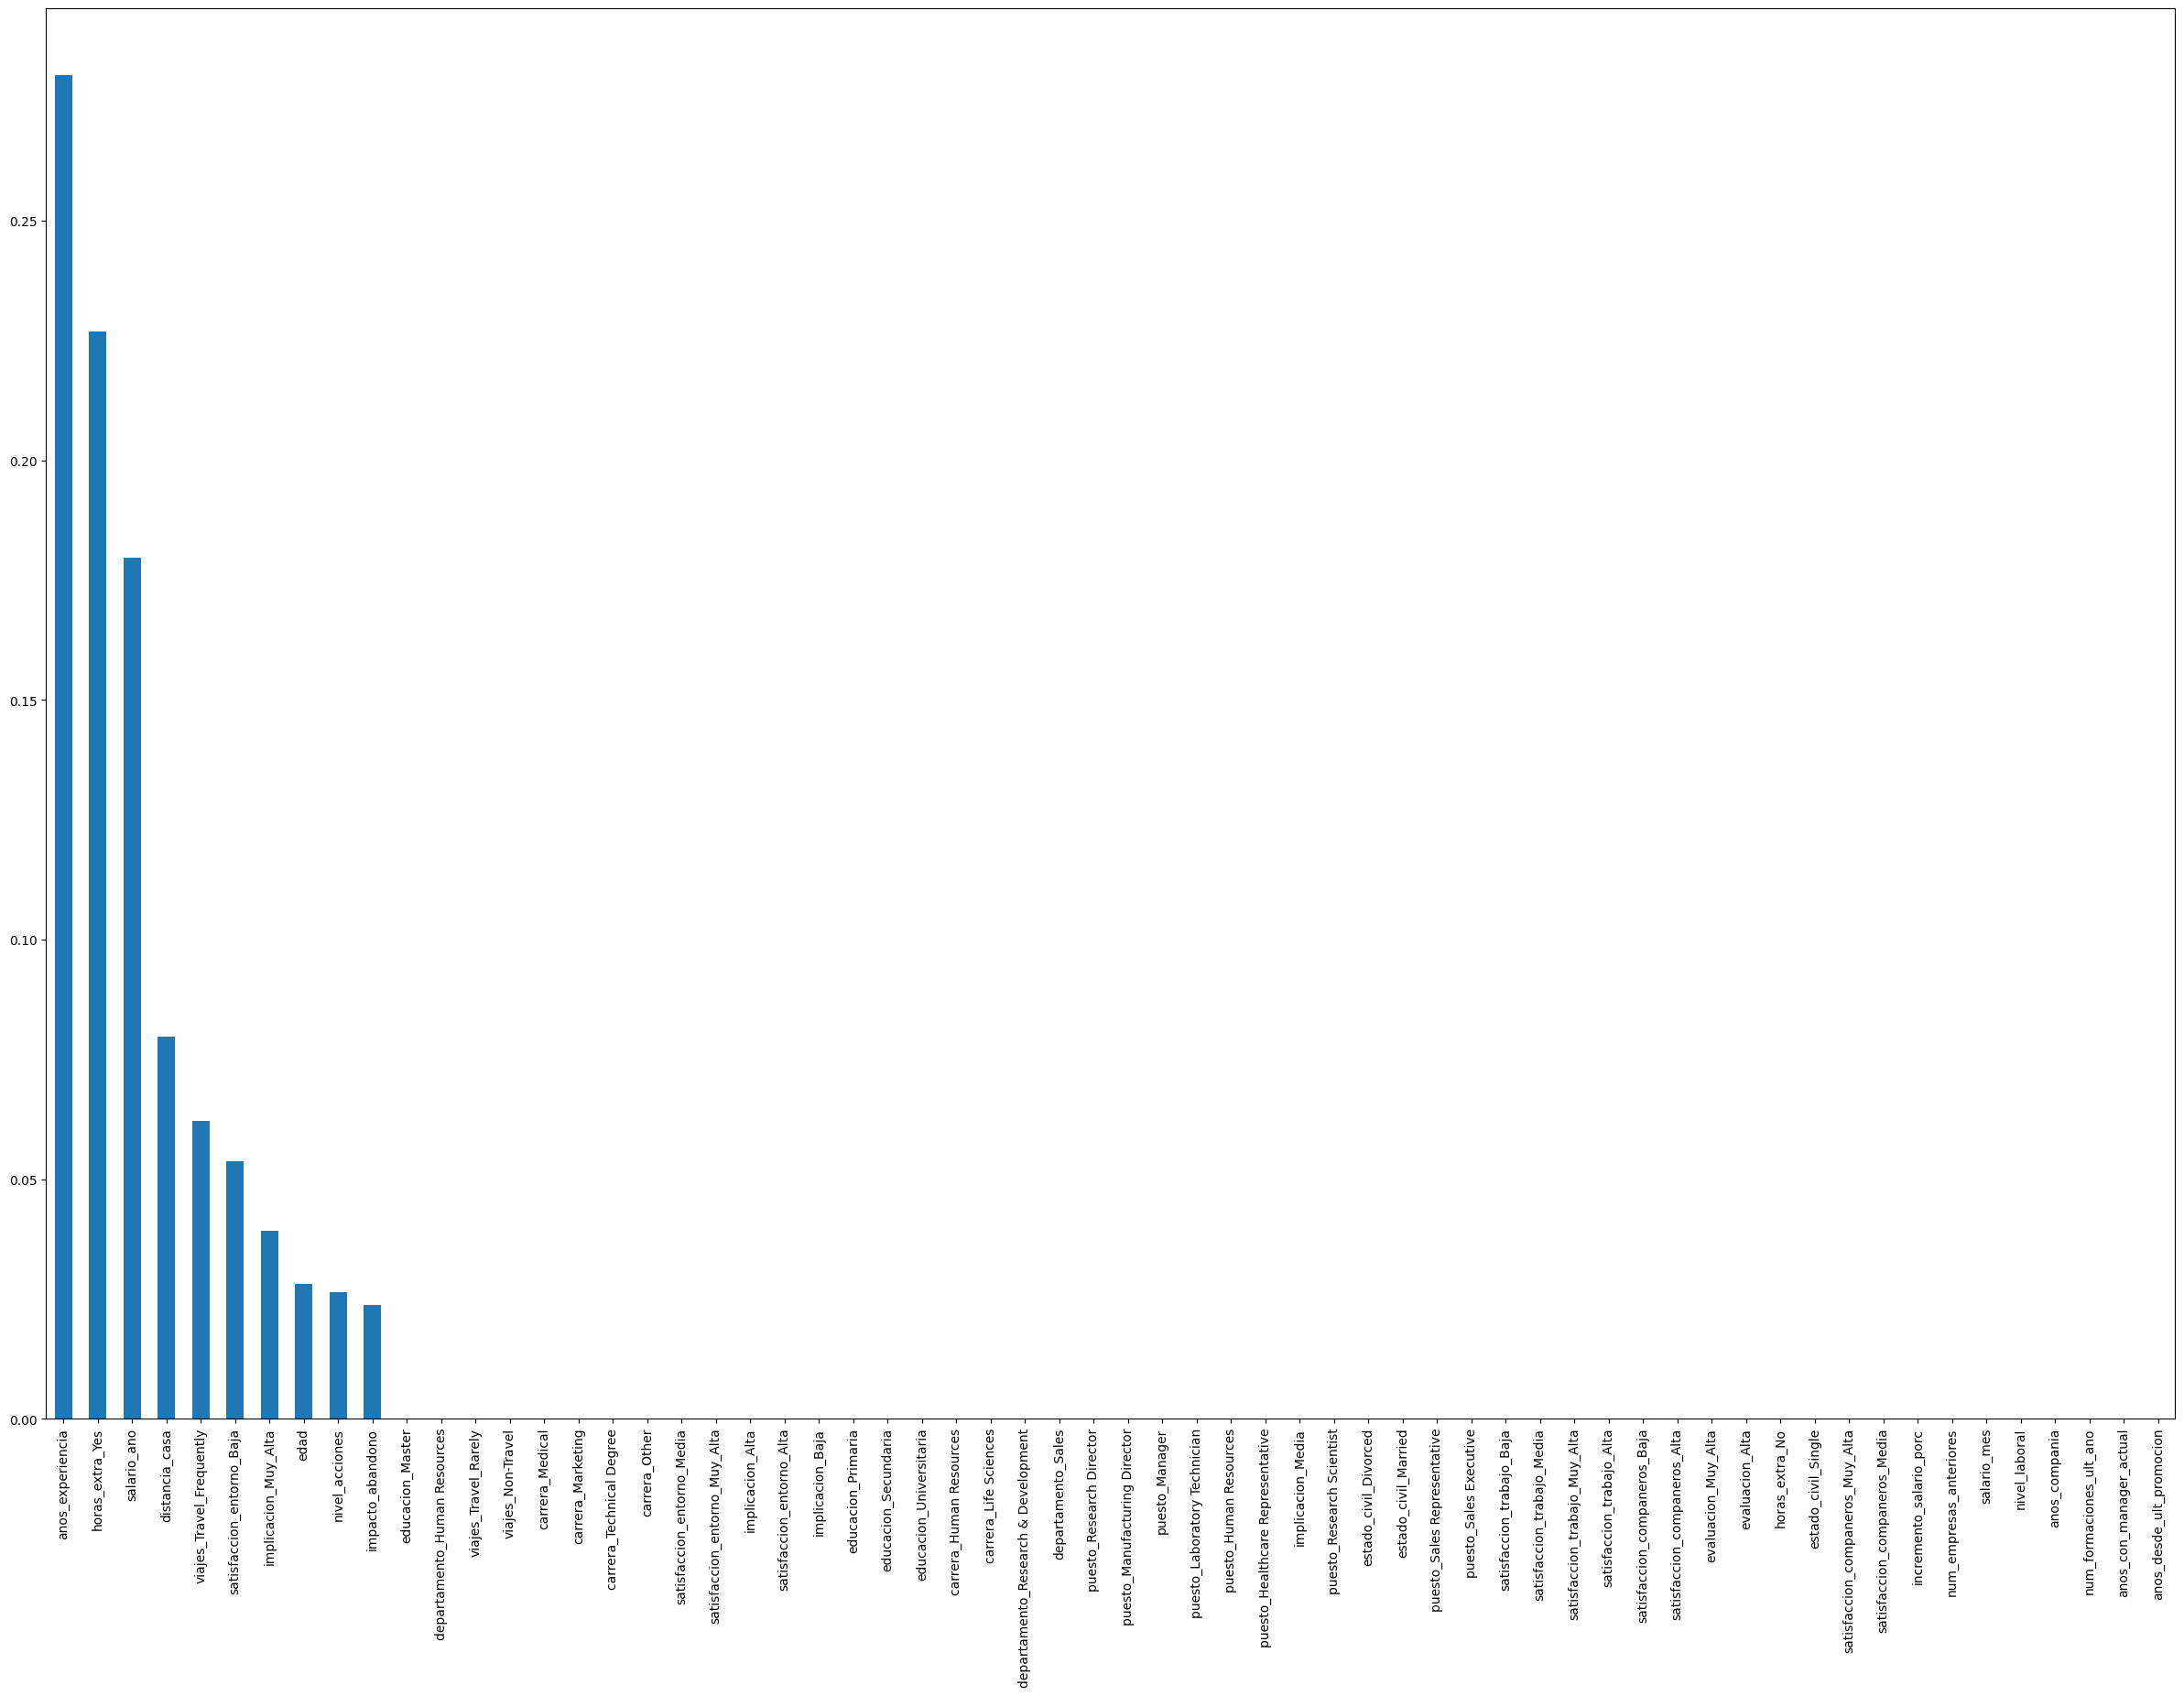

In [51]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### DEPLOYENT

Adding the created scoring into the main dataframe

In [52]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.161458
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.045131
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.750000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.161458
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.045131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.045131
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.045131
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.161458


As an example we can retrieve a list with the top 10 employees with the highest turnover rate:

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,Baja,Alta,1,...,Alta,1,1,0,1,0,0,28524,4592.364,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,Muy_Alta,1,40,3,40,15,6,123744,25986.240,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0
1928,29,1,Travel_Frequently,Sales,24,Universitaria,Technical Degree,Alta,Muy_Alta,1,...,Muy_Alta,0,1,3,1,0,0,13092,2107.812,1.0
911,32,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,0,1,2,1,0,1,33540,6607.380,1.0
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
1269,19,0,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Media,Muy_Alta,1,...,Muy_Alta,0,1,2,1,0,1,35928,7077.816,1.0
1219,24,1,Travel_Rarely,Research & Development,17,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Baja,1,1,3,1,0,0,26520,4269.720,1.0
1604,28,1,Travel_Rarely,Research & Development,24,Universitaria,Medical,Alta,Alta,1,...,Alta,3,1,3,1,0,0,28896,4652.256,1.0


Another example, filtering rate by the difererent roles


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


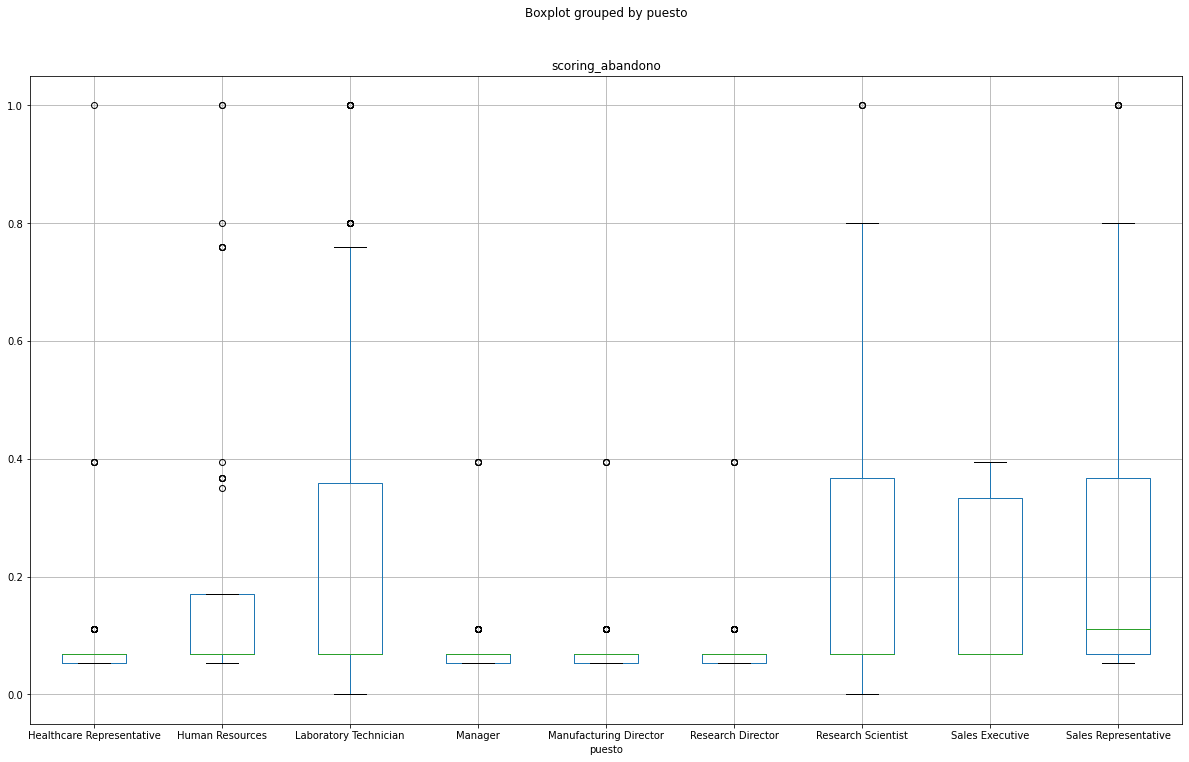

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### SAVING THE RESULTS

In [53]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.161458
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.045131
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.750000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.161458
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.045131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.045131
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.045131
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.161458


In [54]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>